**1. Mounting Google Drive and Installing Dependencies**

In [1]:
!pip install opencv-python
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Importing Libraries**

In [3]:
import os
import cv2
import numpy as np

def parse_annotations(txt_path, img_shape):
    with open(txt_path, 'r') as file:
        lines = file.readlines()

    height, width = img_shape[:2]
    boxes = []

    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        center_x = float(parts[1])
        center_y = float(parts[2])
        box_width = float(parts[3])
        box_height = float(parts[4])

        xmin = int((center_x - box_width / 2) * width)
        xmax = int((center_x + box_width / 2) * width)
        ymin = int((center_y - box_height / 2) * height)
        ymax = int((center_y + box_height / 2) * height)

        boxes.append((class_id, xmin, ymin, xmax, ymax))

    return boxes

def load_data(data_path):
    images = []
    labels = []

    for folder in ['train', 'test']:
        images_folder = os.path.join(data_path, folder, 'images')
        labels_folder = os.path.join(data_path, folder, 'labels')

        for file in os.listdir(images_folder):
            if file.endswith(".jpg"):
                image_path = os.path.join(images_folder, file)
                txt_path = os.path.join(labels_folder, file.replace(".jpg", ".txt"))

                if not os.path.exists(txt_path):
                    print(f"Annotation file {txt_path} does not exist")
                    continue

                image = cv2.imread(image_path)
                if image is None:
                    print(f"Image {image_path} could not be loaded")
                    continue

                boxes = parse_annotations(txt_path, image.shape)
                if not boxes:
                    print(f"No boxes found in {txt_path}")
                    continue

                images.append(image)
                labels.append(boxes)
                print(f"Loaded {image_path} with {len(boxes)} boxes")

    return images, labels

data_path = '/content/drive/MyDrive/retail_test'
images, labels = load_data(data_path)
print(f"Loaded {len(images)} images with annotations")

Loaded /content/drive/MyDrive/retail_test/train/images/test2020_365_jpg.rf.bf9c5d50279ca0ebda16e0e7caf5aebe.jpg with 8 boxes
Loaded /content/drive/MyDrive/retail_test/train/images/test2020_365_jpg.rf.b49aa2b4c7895a4d5920b27ffa8358ba.jpg with 3 boxes
Loaded /content/drive/MyDrive/retail_test/train/images/test2020_337_jpg.rf.09ac22658342b653ff88ba0b45f89e77.jpg with 1 boxes
Loaded /content/drive/MyDrive/retail_test/train/images/test2020_340_jpg.rf.4daa14b925c55b8fb6e0ae1307e3e749.jpg with 6 boxes
Loaded /content/drive/MyDrive/retail_test/train/images/test2020_359_jpg.rf.100de2e239b6ddd74dcc558e11b67f84.jpg with 1 boxes
Loaded /content/drive/MyDrive/retail_test/train/images/test2020_361_jpg.rf.0244d294be68c8d66d9efc7ee8018051.jpg with 12 boxes
Loaded /content/drive/MyDrive/retail_test/train/images/test2020_333_jpg.rf.f65639f30568db25722ceaf708f6a97f.jpg with 8 boxes
Loaded /content/drive/MyDrive/retail_test/train/images/test2020_338_jpg.rf.d65fe272c9d89d899706a4be69833bc8.jpg with 7 boxes

Loaded /content/drive/MyDrive/retail_test/train/images/test2020_365_jpg.rf.bf9c5d50279ca0ebda16e0e7caf5aebe.jpg with 8 boxes
Loaded /content/drive/MyDrive/retail_test/train/images/test2020_365_jpg.rf.b49aa2b4c7895a4d5920b27ffa8358ba.jpg with 3 boxes
Loaded /content/drive/MyDrive/retail_test/train/images/test2020_337_jpg.rf.09ac22658342b653ff88ba0b45f89e77.jpg with 1 boxes
Loaded /content/drive/MyDrive/retail_test/train/images/test2020_340_jpg.rf.4daa14b925c55b8fb6e0ae1307e3e749.jpg with 6 boxes
Loaded /content/drive/MyDrive/retail_test/train/images/test2020_359_jpg.rf.100de2e239b6ddd74dcc558e11b67f84.jpg with 1 boxes
Loaded /content/drive/MyDrive/retail_test/train/images/test2020_361_jpg.rf.0244d294be68c8d66d9efc7ee8018051.jpg with 12 boxes
Loaded /content/drive/MyDrive/retail_test/train/images/test2020_333_jpg.rf.f65639f30568db25722ceaf708f6a97f.jpg with 8 boxes
Loaded /content/drive/MyDrive/retail_test/train/images/test2020_338_jpg.rf.d65fe272c9d89d899706a4be69833bc8.jpg with 7 boxes

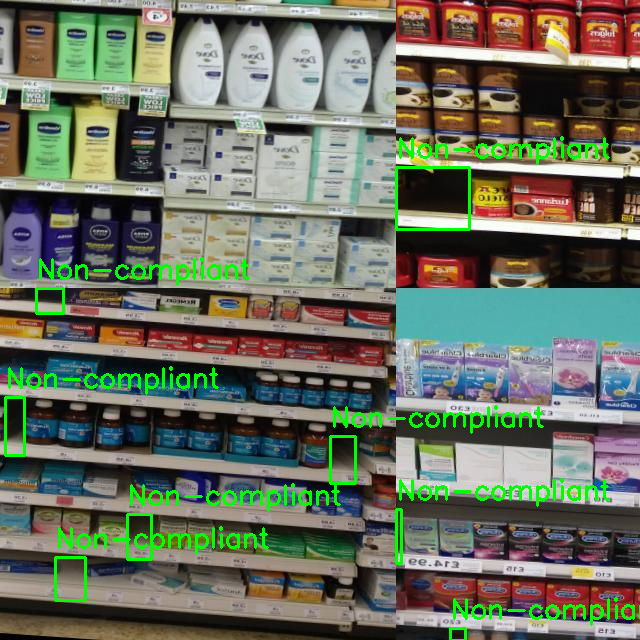

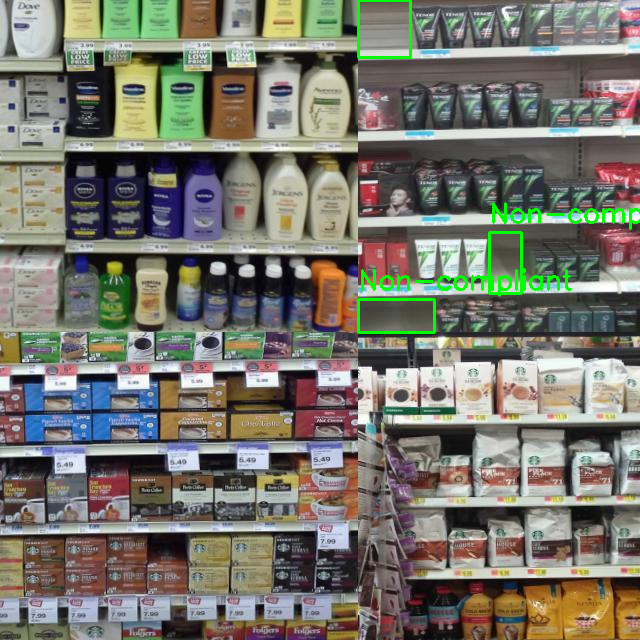

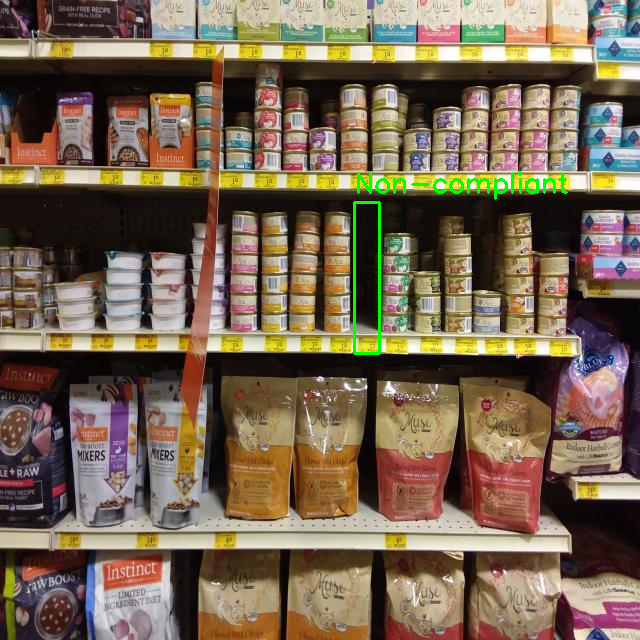

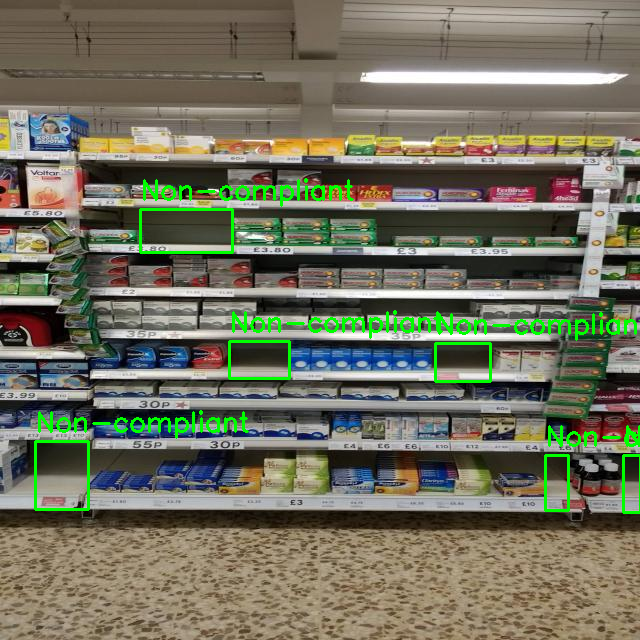

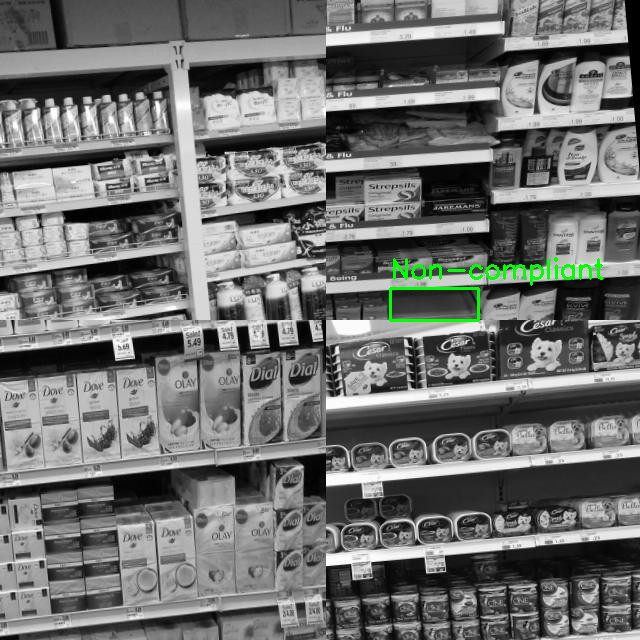

In [4]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def parse_annotations(txt_path, img_shape):
    with open(txt_path, 'r') as file:
        lines = file.readlines()

    height, width = img_shape[:2]
    boxes = []

    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        center_x = float(parts[1])
        center_y = float(parts[2])
        box_width = float(parts[3])
        box_height = float(parts[4])

        xmin = int((center_x - box_width / 2) * width)
        xmax = int((center_x + box_width / 2) * width)
        ymin = int((center_y - box_height / 2) * height)
        ymax = int((center_y + box_height / 2) * height)

        boxes.append((class_id, xmin, ymin, xmax, ymax))

    return boxes

def load_data(data_path):
    images = []
    labels = []

    for folder in ['train', 'test']:
        images_folder = os.path.join(data_path, folder, 'images')
        labels_folder = os.path.join(data_path, folder, 'labels')

        for file in os.listdir(images_folder):
            if file.endswith(".jpg"):
                image_path = os.path.join(images_folder, file)
                txt_path = os.path.join(labels_folder, file.replace(".jpg", ".txt"))

                if not os.path.exists(txt_path):
                    print(f"Annotation file {txt_path} does not exist")
                    continue

                image = cv2.imread(image_path)
                if image is None:
                    print(f"Image {image_path} could not be loaded")
                    continue

                boxes = parse_annotations(txt_path, image.shape)
                if not boxes:
                    print(f"No boxes found in {txt_path}")
                    continue

                images.append(image)
                labels.append(boxes)
                print(f"Loaded {image_path} with {len(boxes)} boxes")

    return images, labels

def draw_boxes(image, boxes):
    for box in boxes:
        class_id, xmin, ymin, xmax, ymax = box
        if class_id == 0:  # If the class ID is 0, replace it with 'Non-compliant'
            label = 'Non-compliant'
        else:
            label = str(class_id)
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        cv2.putText(image, label, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


data_path = '/content/drive/MyDrive/retail_test'
images, labels = load_data(data_path)
print(f"Loaded {len(images)} images with annotations")

# Display some images with annotations
for i in range(min(5, len(images))):  # Display up to 5 images
    image = images[i].copy()
    draw_boxes(image, labels[i])
    cv2_imshow(image)  # Use cv2_imshow instead of cv2.imshow
    cv2.waitKey(0)  # Wait for a key press to display the next image

cv2.destroyAllWindows()


In [5]:
images_resized = [cv2.resize(img, (224, 224)) for img in images]
images_resized = np.array(images_resized)

# Flatten labels if necessary for training
labels_flattened = []
for label in labels:
    for box in label:
        labels_flattened.append(box)
labels_flattened = np.array(labels_flattened, dtype=object)

if len(images_resized) == 0 or len(labels_flattened) == 0:
    raise ValueError("No images or labels were loaded. Check your data and annotations.")

print(f"Images shape: {images_resized.shape}")
print(f"Labels shape: {labels_flattened.shape}")


Images shape: (2222, 224, 224, 3)
Labels shape: (13511, 5)


In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def parse_annotations(txt_path, img_shape):
    with open(txt_path, 'r') as file:
        lines = file.readlines()

    height, width = img_shape[:2]
    boxes = []

    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        center_x = float(parts[1])
        center_y = float(parts[2])
        box_width = float(parts[3])
        box_height = float(parts[4])

        xmin = int((center_x - box_width / 2) * width)
        xmax = int((center_x + box_width / 2) * width)
        ymin = int((center_y - box_height / 2) * height)
        ymax = int((center_y + box_height / 2) * height)

        boxes.append((class_id, xmin, ymin, xmax, ymax))

    return boxes

def load_data(data_path):
    images = []
    labels = []

    for folder in ['train', 'test']:
        images_folder = os.path.join(data_path, folder, 'images')
        labels_folder = os.path.join(data_path, folder, 'labels')

        for file in os.listdir(images_folder):
            if file.endswith(".jpg"):
                image_path = os.path.join(images_folder, file)
                txt_path = os.path.join(labels_folder, file.replace(".jpg", ".txt"))

                if not os.path.exists(txt_path):
                    print(f"Annotation file {txt_path} does not exist")
                    continue

                image = cv2.imread(image_path)
                if image is None:
                    print(f"Image {image_path} could not be loaded")
                    continue

                boxes = parse_annotations(txt_path, image.shape)
                if not boxes:
                    print(f"No boxes found in {txt_path}")
                    continue

                images.append(image)
                # Assume compliance if no boxes (meaning no missing items)
                labels.append(0 if boxes else 1)

    return images, labels

def preprocess_data(images, labels):
    images_resized = [cv2.resize(img, (224, 224)) for img in images]
    images_resized = np.array(images_resized)
    labels = np.array(labels)
    return images_resized, labels

data_path = '/content/drive/MyDrive/retail_test'
images, labels = load_data(data_path)
print(f"Loaded {len(images)} images with annotations")

# Preprocess data
images_resized, labels = preprocess_data(images, labels)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images_resized, labels, test_size=0.2, random_state=42)

# Define the model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=8, validation_data=(X_val, y_val))

# Evaluate the model
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Example of making predictions
def predict_compliance(model, image):
    image_resized = cv2.resize(image, (224, 224))
    image_resized = np.expand_dims(image_resized, axis=0)
    prediction = model.predict(image_resized)
    return "Compliant" if prediction > 0.5 else "Non-compliant"

# Test the prediction function
for i in range(5):
    result = predict_compliance(model, images[i])
    print(f"Image {i+1} is {result}")


No boxes found in /content/drive/MyDrive/retail_test/train/labels/train_5344_jpg.rf.17d45a90da70ae5e9f7150b281658408.txt
Annotation file /content/drive/MyDrive/retail_test/train/labels/1ad3e791-8ac9-4fb8-813c-16d99d657bfe_jpg.rf.0f28b172de47364754f11da4ccecab42.txt does not exist
Annotation file /content/drive/MyDrive/retail_test/train/labels/1e8e7906-193d-4f54-8407-3cdf51506b05_jpg.rf.fee211d0314d4b2bf85502b84897580c.txt does not exist
Annotation file /content/drive/MyDrive/retail_test/train/labels/2185caa3-8fcb-41c7-8137-2732d873b60d_jpg.rf.96565ed797697f54d0d81a61e69428d2.txt does not exist
Annotation file /content/drive/MyDrive/retail_test/train/labels/2c05fc47-d1d3-412c-bf0f-b5db2708a551_jpg.rf.759883faf3b2872f040b18792d5889f7.txt does not exist
Annotation file /content/drive/MyDrive/retail_test/train/labels/2e7d046b-c330-4c13-afc8-13fba209d949_jpg.rf.c2baa01ae90ccb2c38ae743fa308ae05.txt does not exist
Annotation file /content/drive/MyDrive/retail_test/train/labels/2a061a07-3b61-4

In [7]:
# Evaluate the model
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Example of making predictions
def predict_compliance(model, image):
    image_resized = cv2.resize(image, (224, 224))
    image_resized = np.expand_dims(image_resized, axis=0)
    prediction = model.predict(image_resized)
    return "Compliant" if prediction > 0.5 else "Non-compliant"

# Test the prediction function
for i in range(5):
    result = predict_compliance(model, images[i])
    print(f"Image {i+1} is {result}")

14/14 [==============================] - 1s 84ms/step
Accuracy: 1.0
[[445]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       445

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445

1/1 [==============================] - 0s 21ms/step
Image 1 is Non-compliant
1/1 [==============================] - 0s 21ms/step
Image 2 is Non-compliant
1/1 [==============================] - 0s 25ms/step
Image 3 is Non-compliant
1/1 [==============================] - 0s 24ms/step
Image 4 is Non-compliant
1/1 [==============================] - 0s 21ms/step
Image 5 is Non-compliant


1/1 [==============================] - 0s 28ms/step
Image 1 is Non-compliant
1/1 [==============================] - 0s 22ms/step
Image 2 is Non-compliant
1/1 [==============================] - 0s 21ms/step
Image 3 is Non-compliant
1/1 [==============================] - 0s 26ms/step
Image 4 is Non-compliant
1/1 [==============================] - 0s 24ms/step
Image 5 is Non-compliant


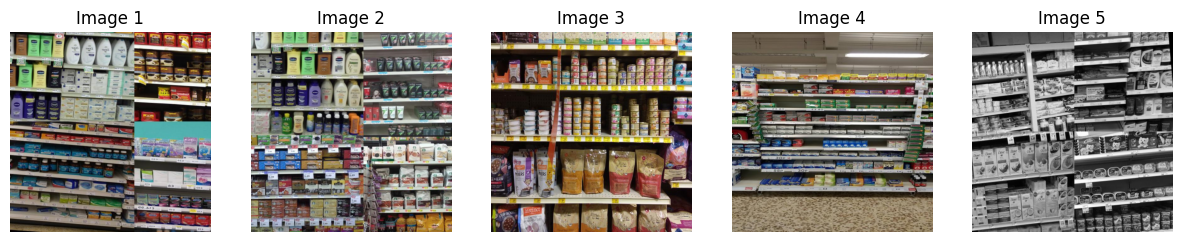

In [8]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 3))
    for i, image in enumerate(images):
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}")
    plt.show()

# Test the prediction function
test_images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images[:5]]
for i, image in enumerate(test_images):
    result = predict_compliance(model, image)
    print(f"Image {i+1} is {result}")

# Display the test images
display_images(test_images)


1/1 [==============================] - 0s 32ms/step
Image 1 is Non-compliant
1/1 [==============================] - 0s 33ms/step
Image 2 is Non-compliant
1/1 [==============================] - 0s 48ms/step
Image 3 is Non-compliant
1/1 [==============================] - 0s 41ms/step
Image 4 is Non-compliant
1/1 [==============================] - 0s 37ms/step
Image 5 is Non-compliant


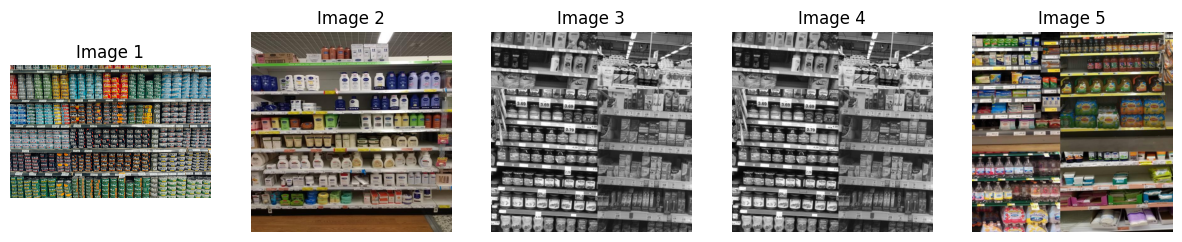

In [9]:
import cv2

# Example of making predictions
def predict_compliance(model, image):
    image_resized = cv2.resize(image, (224, 224))
    image_resized = np.expand_dims(image_resized, axis=0)
    prediction = model.predict(image_resized)
    return "Compliant" if prediction > 0.5 else "Non-compliant"

# Function to display images
def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 3))
    for i, image in enumerate(images):
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}")
    plt.show()

# Test specific images by passing their paths
image_paths_to_test = ["/content/drive/MyDrive/retail_test/test/images/testing1.jpg", "/content/drive/MyDrive/retail_test/test/images/test2020_1008_jpg.rf.4000b10bafa46aa0862f29ba58124dff.jpg", "/content/drive/MyDrive/retail_test/test/images/test2020_1027_jpg.rf.41ca9d7da93b460ec766e2955bad1336.jpg", "/content/drive/MyDrive/retail_test/test/images/test2020_1027_jpg.rf.f0f23d0fda65d9d2770f214784db1784.jpg", "/content/drive/MyDrive/retail_test/test/images/test2020_104_jpg.rf.b156167a632bde7272495ef18412239e.jpg"]

# Load and preprocess images
test_images = [cv2.imread(image_path) for image_path in image_paths_to_test]
test_images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in test_images]

# Test the prediction function
for i, image in enumerate(test_images):
    result = predict_compliance(model, image)
    print(f"Image {i+1} is {result}")

# Display the test images
display_images(test_images)



1/1 [==============================] - 0s 23ms/step
Image 1 is Non-compliant
1/1 [==============================] - 0s 24ms/step
Image 2 is Non-compliant
1/1 [==============================] - 0s 22ms/step
Image 3 is Non-compliant
1/1 [==============================] - 0s 25ms/step
Image 4 is Non-compliant
1/1 [==============================] - 0s 23ms/step
Image 5 is Non-compliant
1/1 [==============================] - 0s 23ms/step
Image 6 is Non-compliant
1/1 [==============================] - 0s 22ms/step
Image 7 is Non-compliant
1/1 [==============================] - 0s 23ms/step
Image 8 is Non-compliant
1/1 [==============================] - 0s 22ms/step
Image 9 is Non-compliant
1/1 [==============================] - 0s 23ms/step
Image 10 is Non-compliant
1/1 [==============================] - 0s 22ms/step
Image 11 is Non-compliant
1/1 [==============================] - 0s 25ms/step
Image 12 is Non-compliant
1/1 [==============================] - 0s 21ms/step
Image 13 is Non-compl

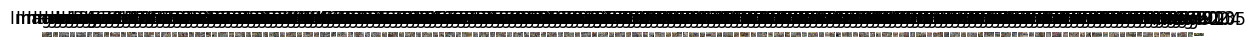

In [10]:
import os

# Directory containing test images
test_folder_path = "/content/drive/MyDrive/retail_test/test/images/"

# Get list of all image files in the folder
image_files = [file for file in os.listdir(test_folder_path) if file.endswith(".jpg")]

# Load and preprocess images
test_images = [cv2.imread(os.path.join(test_folder_path, image)) for image in image_files]
test_images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in test_images]

# Test the prediction function for all images
for i, image in enumerate(test_images):
    result = predict_compliance(model, image)
    print(f"Image {i+1} is {result}")

# Display the test images
display_images(test_images)
